In [1]:
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
%matplotlib notebook
from main import *

In [2]:
#Extracting the SS coverages previously saved and extracted from kMC files
ss_COVG_NONLAT = pd.read_csv('SS_Covg_nonLat.csv')
ss_COVG_LAT = pd.read_csv('SS_Covg_Lat.csv')

In [3]:
#Isolating pressures and ss coverages
Prs_non_lat = ss_COVG_NONLAT.iloc[:,0].to_numpy()
Prs_lat = ss_COVG_LAT.iloc[:,0].to_numpy()
ss_covg_non_lat = ss_COVG_NONLAT.iloc[:,1].to_numpy()
ss_covg_lat = ss_COVG_LAT.iloc[:,1].to_numpy()

In [4]:
#Simulation times from each kMC simulation
t0,tf = 0,750.000000000102

In [5]:
%%time

#Creating NONLAT SSCOVG

#Performing SS MIKI MKM simulations for non lateral case
from main import *
MKM = MKModel('Atomic.csv','Stoich.csv','Param.csv')
MKM.Thermo_Constraint = 'OFF'
MKM.set_limits_of_integration(t0,tf)
MKM.rate_const_correction='None'
MKM_SS_covg_NONLAT = []
Prs = Prs_non_lat
for i in np.arange(len(Prs)):
    MKM.set_rxnconditions(Pr=[Prs[i]])
    MKM_SS_covg_NONLAT = np.append(MKM_SS_covg_NONLAT,MKM.get_SS_coverages(print_warning=False)[0])

Mass is conserved. 

CPU times: user 2.63 s, sys: 9.22 ms, total: 2.64 s
Wall time: 2.64 s


In [6]:
%%time
#Performing SS MIKI MKM simulations for non lateral case
from main import *
MKM = MKModel('Atomic.csv','Stoich.csv','Param.csv')
MKM.Thermo_Constraint = 'OFF'
MKM.set_limits_of_integration(t0,tf)
MKM.rate_const_correction='None'
MKM_SS_covg_LAT = []
Prs = Prs_lat
for i in np.arange(len(Prs)):
    MKM.set_rxnconditions(Pr=[Prs[i]])
    MKM_SS_covg_LAT = np.append(MKM_SS_covg_LAT,MKM.get_SS_coverages(print_warning=False)[0])

Mass is conserved. 

CPU times: user 4.48 s, sys: 16.9 ms, total: 4.5 s
Wall time: 4.5 s


In [7]:
rx = len(ss_covg_lat)
Corr_fac = np.zeros(rx) 

In [8]:
import math
MKM_values = MKM_SS_covg_LAT
KMC_values = ss_covg_lat
def corr_func(MKM_values,KMC_values):
    for i in np.arange(rx):
        num = KMC_values[i]
        den = MKM_values[i]
        #Preventing log(0)
        if float(num) == 0:
            num = 1e-20
        if float(den) == 0:
            den = 1e-20

        frac = num/den
        if float(frac) < 0: #(i.e the rates are either being calculated as consumed versus produced)
            frac = abs(frac)

        val = np.log(frac)
        Corr_fac[i] = val
        if math.isinf(val) or math.isnan(val):
            raise Exception('ERROR: inf or nan is present')
    return Corr_fac

## LSTM learning of corrections

2023-09-05 11:37:49.078545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
7/7 - 0s - loss: 0.7301 - 193ms/epoch - 28ms/step
Epoch 2/500
7/7 - 0s - loss: 0.3451 - 8ms/epoch - 1ms/step
Epoch 3/500
7/7 - 0s - loss: 0.1160 - 6ms/epoch - 791us/step
Epoch 4/500
7/7 - 0s - loss: 0.0462 - 8ms/epoch - 1ms/step
Epoch 5/500
7/7 - 0s - loss: 0.0337 - 5ms/epoch - 731us/step
Epoch 6/500
7/7 - 0s - loss: 0.0376 - 8ms/epoch - 1ms/step
Epoch 7/500
7/7 - 0s - loss: 0.0327 - 6ms/epoch - 836us/step
Epoch 8/500
7/7 - 0s - loss: 0.0266 - 7ms/epoch - 1ms/step
Epoch 9/500
7/7 - 0s - loss: 0.0232 - 5ms/epoch - 742us/step
Epoch 10/500
7/7 - 0s - loss: 0.0221 - 7ms/epoch - 975us/step
Epoch 11/500
7/7 - 0s - loss: 0.0207 - 5ms/epoch - 776us/step
Epoch 12/500
7/7 - 0s - loss: 0.0185 - 5ms/epoch - 761us/step
Epoch 13/500
7/7 - 0s - loss: 0.0176 - 8ms/epoch - 1ms/step
Epoch 14/500
7/7 - 0s - loss: 0.0177 - 6ms/epoch - 788us/step
Epoch 15/500
7/7 - 0s - loss: 0.0156 - 7ms/epoch - 941us/step
Epoch 16/500
7/7 - 0s - loss: 0.0145 - 6ms/epoch - 804us/step
Epoch 17/500
7/7 - 0s - lo

7/7 - 0s - loss: 6.5727e-04 - 11ms/epoch - 2ms/step
Epoch 131/500
7/7 - 0s - loss: 6.9320e-04 - 6ms/epoch - 911us/step
Epoch 132/500
7/7 - 0s - loss: 7.8141e-04 - 67ms/epoch - 10ms/step
Epoch 133/500
7/7 - 0s - loss: 7.4134e-04 - 13ms/epoch - 2ms/step
Epoch 134/500
7/7 - 0s - loss: 7.1370e-04 - 6ms/epoch - 927us/step
Epoch 135/500
7/7 - 0s - loss: 6.2965e-04 - 7ms/epoch - 1ms/step
Epoch 136/500
7/7 - 0s - loss: 7.0000e-04 - 5ms/epoch - 702us/step
Epoch 137/500
7/7 - 0s - loss: 6.7582e-04 - 5ms/epoch - 682us/step
Epoch 138/500
7/7 - 0s - loss: 6.8484e-04 - 7ms/epoch - 1ms/step
Epoch 139/500
7/7 - 0s - loss: 7.3870e-04 - 5ms/epoch - 721us/step
Epoch 140/500
7/7 - 0s - loss: 6.4833e-04 - 6ms/epoch - 822us/step
Epoch 141/500
7/7 - 0s - loss: 6.5315e-04 - 6ms/epoch - 831us/step
Epoch 142/500
7/7 - 0s - loss: 6.5235e-04 - 5ms/epoch - 684us/step
Epoch 143/500
7/7 - 0s - loss: 6.9407e-04 - 7ms/epoch - 1ms/step
Epoch 144/500
7/7 - 0s - loss: 6.6343e-04 - 5ms/epoch - 750us/step
Epoch 145/500
7/7

7/7 - 0s - loss: 6.3876e-04 - 4ms/epoch - 621us/step
Epoch 254/500
7/7 - 0s - loss: 6.7362e-04 - 4ms/epoch - 590us/step
Epoch 255/500
7/7 - 0s - loss: 9.1751e-04 - 5ms/epoch - 696us/step
Epoch 256/500
7/7 - 0s - loss: 5.7170e-04 - 4ms/epoch - 625us/step
Epoch 257/500
7/7 - 0s - loss: 6.2736e-04 - 4ms/epoch - 605us/step
Epoch 258/500
7/7 - 0s - loss: 7.0509e-04 - 5ms/epoch - 754us/step
Epoch 259/500
7/7 - 0s - loss: 6.4703e-04 - 5ms/epoch - 661us/step
Epoch 260/500
7/7 - 0s - loss: 5.9784e-04 - 5ms/epoch - 658us/step
Epoch 261/500
7/7 - 0s - loss: 6.5410e-04 - 5ms/epoch - 684us/step
Epoch 262/500
7/7 - 0s - loss: 6.6497e-04 - 5ms/epoch - 718us/step
Epoch 263/500
7/7 - 0s - loss: 6.3575e-04 - 5ms/epoch - 669us/step
Epoch 264/500
7/7 - 0s - loss: 7.7030e-04 - 6ms/epoch - 828us/step
Epoch 265/500
7/7 - 0s - loss: 6.7904e-04 - 5ms/epoch - 710us/step
Epoch 266/500
7/7 - 0s - loss: 6.0231e-04 - 5ms/epoch - 669us/step
Epoch 267/500
7/7 - 0s - loss: 7.0397e-04 - 6ms/epoch - 837us/step
Epoch 268

Epoch 376/500
7/7 - 0s - loss: 5.4027e-04 - 5ms/epoch - 646us/step
Epoch 377/500
7/7 - 0s - loss: 6.9706e-04 - 4ms/epoch - 595us/step
Epoch 378/500
7/7 - 0s - loss: 6.1799e-04 - 6ms/epoch - 818us/step
Epoch 379/500
7/7 - 0s - loss: 6.5968e-04 - 5ms/epoch - 650us/step
Epoch 380/500
7/7 - 0s - loss: 6.4263e-04 - 6ms/epoch - 794us/step
Epoch 381/500
7/7 - 0s - loss: 5.4879e-04 - 4ms/epoch - 633us/step
Epoch 382/500
7/7 - 0s - loss: 5.6953e-04 - 4ms/epoch - 635us/step
Epoch 383/500
7/7 - 0s - loss: 8.5441e-04 - 5ms/epoch - 733us/step
Epoch 384/500
7/7 - 0s - loss: 6.8478e-04 - 4ms/epoch - 641us/step
Epoch 385/500
7/7 - 0s - loss: 5.9101e-04 - 4ms/epoch - 606us/step
Epoch 386/500
7/7 - 0s - loss: 9.0030e-04 - 5ms/epoch - 758us/step
Epoch 387/500
7/7 - 0s - loss: 6.3932e-04 - 4ms/epoch - 637us/step
Epoch 388/500
7/7 - 0s - loss: 6.2512e-04 - 4ms/epoch - 604us/step
Epoch 389/500
7/7 - 0s - loss: 6.5145e-04 - 5ms/epoch - 673us/step
Epoch 390/500
7/7 - 0s - loss: 5.4444e-04 - 5ms/epoch - 691us/

Epoch 500/500
7/7 - 0s - loss: 7.1534e-04 - 8ms/epoch - 1ms/step
Train Score: 0.00 MSE (0.02 RMSE)
Test Score: 0.00 MSE (0.02 RMSE)
1/1 [==============================] - 0s 14ms/step


<IPython.core.display.Javascript object>


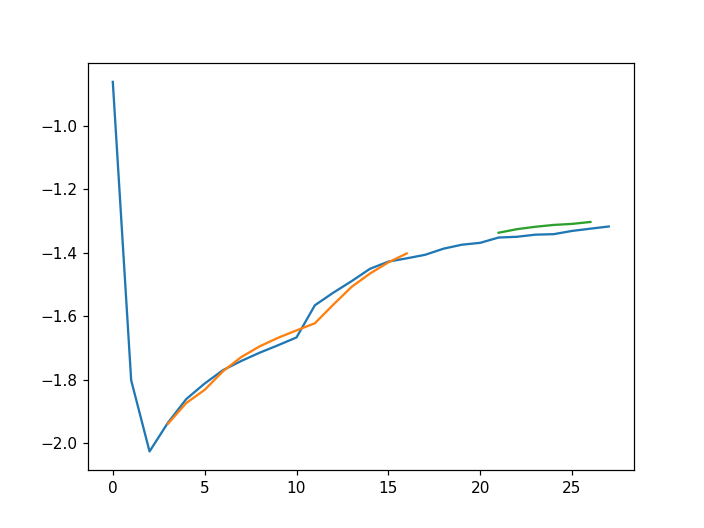

In [9]:
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
# fix random seed for reproducibilityz
tf.random.set_seed(7)
# load the dataset
dataframe = pd.DataFrame(corr_func(MKM_values,KMC_values))
dataset = dataframe.values
dataset = dataset.astype('float64')

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(32, input_shape=(look_back,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [10]:
np.where(np.isnan(trainPredictPlot))[0]

array([ 0,  1,  2, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [11]:
trainPredictPlot

array([[        nan],
       [        nan],
       [        nan],
       [-1.93874741],
       [-1.87317693],
       [-1.83181822],
       [-1.773175  ],
       [-1.72825086],
       [-1.69464743],
       [-1.66779447],
       [-1.64462709],
       [-1.6221863 ],
       [-1.5637027 ],
       [-1.50747979],
       [-1.46554983],
       [-1.43036926],
       [-1.402318  ],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan]])

In [12]:
combined = trainPredictPlot
for i in np.arange(len(trainPredictPlot)):
    if i>17:
        combined[i] = testPredictPlot[i]

In [13]:
Pred_corr = combined

In [14]:
for i in np.arange(len(Pred_corr)):
    MKM_SS_covg_LAT[i] = MKM_SS_covg_LAT[i]*np.exp(Pred_corr[i])

<IPython.core.display.Javascript object>


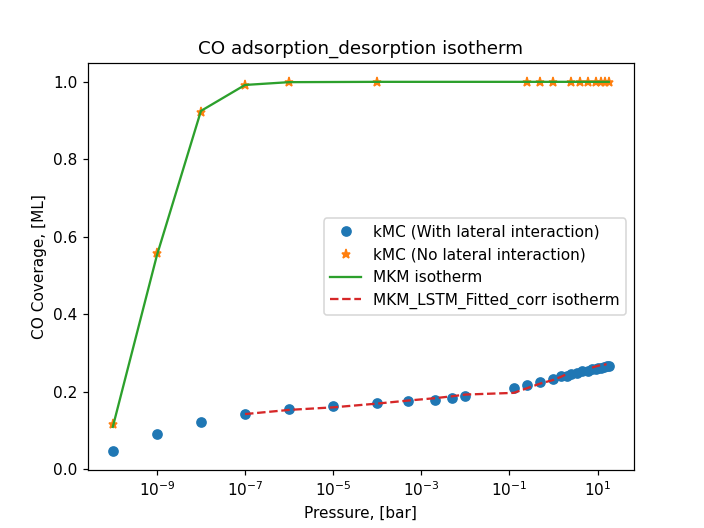

In [15]:
plt.figure()
plt.semilogx(Prs_lat,ss_covg_lat,'o',label='kMC (With lateral interaction)')
plt.semilogx(Prs_non_lat,ss_covg_non_lat,'*',label='kMC (No lateral interaction)')
plt.semilogx(Prs_non_lat,MKM_SS_covg_NONLAT,'-',label='MKM isotherm')
plt.semilogx(Prs_lat,MKM_SS_covg_LAT,'--',label='MKM_LSTM_Fitted_corr isotherm')
# plt.semilogx(Prs_lat,combined,'--',label='Fitted LSTM') #plot
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

<IPython.core.display.Javascript object>


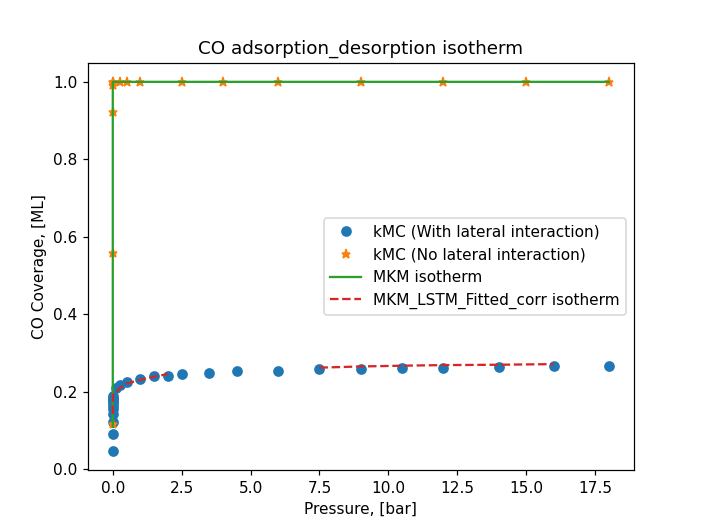

In [16]:
plt.figure()
plt.plot(Prs_lat,ss_covg_lat,'o',label='kMC (With lateral interaction)')
plt.plot(Prs_non_lat,ss_covg_non_lat,'*',label='kMC (No lateral interaction)')
plt.plot(Prs_non_lat,MKM_SS_covg_NONLAT,'-',label='MKM isotherm')
plt.plot(Prs_lat,MKM_SS_covg_LAT,'--',label='MKM_LSTM_Fitted_corr isotherm')
# plt.semilogx(Prs_lat,combined,'--',label='Fitted LSTM') #plot
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

In [17]:
Pred_corr

array([[        nan],
       [        nan],
       [        nan],
       [-1.93874741],
       [-1.87317693],
       [-1.83181822],
       [-1.773175  ],
       [-1.72825086],
       [-1.69464743],
       [-1.66779447],
       [-1.64462709],
       [-1.6221863 ],
       [-1.5637027 ],
       [-1.50747979],
       [-1.46554983],
       [-1.43036926],
       [-1.402318  ],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [-1.33710063],
       [-1.32585561],
       [-1.31832075],
       [-1.31252742],
       [-1.30922782],
       [-1.30315924],
       [        nan]])

In [18]:
trainY

array([-1.93531708, -1.86077777, -1.81193109, -1.76966378, -1.74064618,
       -1.71470833, -1.69123731, -1.66676978, -1.56548685, -1.52597715,
       -1.48952706, -1.45064157, -1.42805597, -1.41768069])

In [19]:
# raw_pres = np.logspace(10e-10, 10e2, num=28, base=10.0)
# %%time
# #Performing SS MIKI MKM simulations for non lateral case
# from main import *
# MKM = MKModel('Atomic.csv','Stoich.csv','Param.csv')
# MKM.Thermo_Constraint = 'OFF'
# MKM.set_limits_of_integration(t0,tf)
# MKM.rate_const_correction='None'
# new_mkm_MKM_SS_covg_LAT = []
# Prs = raw_pres
# for i in np.arange(len(Prs)):
#     MKM.set_rxnconditions(Pr=[Prs[i]])
#     MKM_SS_covg_LAT = np.append(MKM_SS_covg_LAT,MKM.get_SS_coverages(print_warning=False)[0])

In [20]:
# corr_func(MKM_values,KMC_values)